In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
if (os.getcwd().endswith("dataset_analysis")):
    os.chdir("./../../")
os.getcwd()

'd:\\_MyDoc\\UNI\\MA-INF\\B_Data_Science\\2.Sem\\KDDM1-Know. Disc. & Data Mining 1\\2023_SS\\UE\\Ass\\_repo_kdd1_proj_2023'

In [8]:
os.makedirs("plots/knowledge_gained", exist_ok=True)

In [9]:
df = pd.read_csv("./data/01_cleaning/Universities.csv")

,total,non-na,na_count,unique_count
Id,131,131,0,131
University_name,131,118,13,118
Region,131,131,0,12
Founded_year,131,103,28,59
Motto,131,114,17,113
UK_rank,131,131,0,119
World_rank,131,131,0,130
CWUR_score,131,84,47,73
Minimum_IELTS_score,131,131,0,5
UG_average_fees_(in_pounds),131,131,0,83


<Axes: >

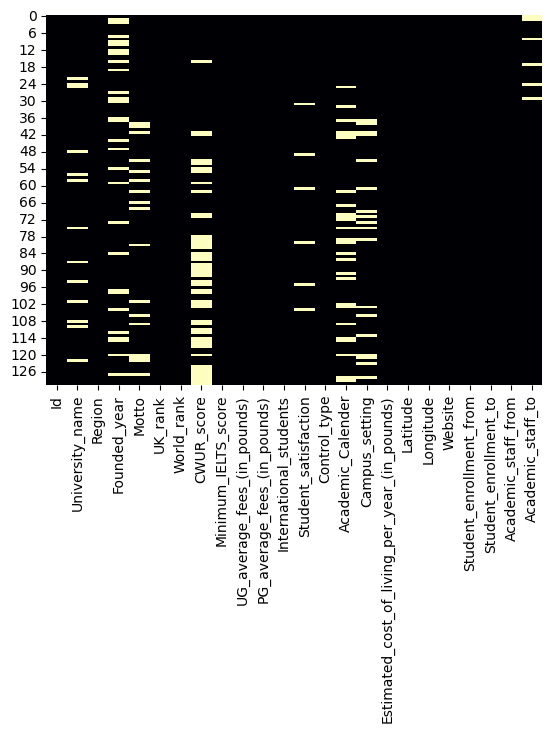

In [10]:
# Plots are generated with intel form:
# https://www.kaggle.com/code/ritish1082/eda-best-university-in-uk
# https://www.kaggle.com/code/sasakitetsuya/why-are-students-in-london-not-so-satisfied


# df.info()
df_info = pd.DataFrame({
    'total': (df.shape[0]),
    'non-na': df.count(),
    'na_count': (df.isna().sum()),
    'unique_count': (df.nunique()),
})
display(df_info)
sns.heatmap(df.isnull(), cmap = 'magma',cbar = False)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,131.0,65.000000,37.960506,0.0000,32.5000,65.0000,97.50000,130.0000
Founded_year,103.0,1930.262136,119.861027,1209.0000,1893.5000,1967.0000,1992.00000,2013.0000
UK_rank,131.0,65.900763,37.922158,1.0000,33.5000,65.0000,98.00000,131.0000
World_rank,131.0,1097.595420,1145.001060,2.0000,196.0000,691.0000,1569.00000,5253.0000
CWUR_score,84.0,73.960714,6.351473,65.9000,68.6750,72.6000,77.70000,94.1000
Minimum_IELTS_score,131.0,4.946565,0.617850,4.0000,4.5000,4.5000,5.50000,6.5000
UG_average_fees_(in_pounds),131.0,12537.450382,2555.318861,8350.0000,10758.0000,12000.0000,13825.00000,23500.0000
PG_average_fees_(in_pounds),131.0,13099.763359,3106.398149,6000.0000,11250.0000,12500.0000,14182.50000,29900.0000
International_students,131.0,0.155903,0.096993,0.0070,0.0860,0.1440,0.20500,0.5050
Student_satisfaction,125.0,0.783224,0.034943,0.6610,0.7650,0.7850,0.80100,0.8790


In [12]:
pd.Series({col: df[col].unique() for col in df})

Id                                               [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
University_name                                  [University of Cambridge, University of Oxford...
Region                                           [East of England, South East England, Scotland...
Founded_year                                     [1209.0, nan, 1907.0, 1966.0, 1895.0, 1832.0, ...
Motto                                            [From here, light and sacred draughts, The Lor...
UK_rank                                          [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
World_rank                                       [4, 2, 86, 8, 404, 23, 70, 130, 14, 80, 261, 9...
CWUR_score                                       [94.1, 93.3, 75.8, 86.6, 72.8, 76.3, 76.1, 88....
Minimum_IELTS_score                                                      [6.5, 5.5, 4.5, 4.0, 6.0]
UG_average_fees_(in_pounds)                      [21750, 21770, 17040, 23500, 16400, 14900, 149...
PG_average

In [13]:
def barPlot(data: pd.Series, y_label = '', title = '', annotate_x_offset=0, order=None):
    # print(data)
    total = data.sum()

    if len(data) > 10:
        data = data.head(n=10)
     
    if order is None:
        order = data.sort_values(ascending=False).index
     
    ax = sns.barplot(x=data.index, y=data, order=order)
    for p in ax.patches:
        bar_label = "{:4.0f}\n{:.1f}%".format(p.get_height(), p.get_height() / total * 100)
        x = p.get_x() + 0.2 / len(data) + annotate_x_offset
        y = p.get_height() + data.max() * 0.01
        ax.annotate(text=bar_label, xy=(x, y), fontsize=9)
        
    # ax.bar_label(ax.containers[0])
    ax.set_ylim(0,  int(data.max() * 1.15))
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.savefig(f'plots/knowledge_gained/bar_{title.lower()}.png')
    plt.show()

In [14]:
def piePlot(data: pd.Series, title:str = ''):
   # print(data)

   total = data.sum()
   def autopct(pct, total):
      cnt = int(pct/ 100 * total)
      if pct < 5:
         return "{:}".format(cnt)
      return "{:}\n{:.1f}%".format(cnt, pct)

   ax = data.plot(kind="pie", autopct=lambda pct: autopct(pct, total))
   ax.set_ylabel('')
   ax.set_title(title)
   plt.tight_layout()
   plt.savefig(f'plots/knowledge_gained/pie_{title.lower()}.png')
   plt.show()


In [15]:
def snsBoxplot(df, colName, groupName, title, order=None):
    # print(df.groupby(groupName)[colName].agg(['min', 'mean', np.median, max]))

    if order is None:
        order = df[groupName].value_counts().index
        # order = df.groupby(groupName)[colName].median().sort_values(ascending=False).index

    plt.title(colName)
    sns.boxplot(data=df, x=df[colName], y=df[groupName], order=order)

    plt.tight_layout()
    plt.savefig(f'plots/knowledge_gained/boxplot_{title}.png')
    plt.show()

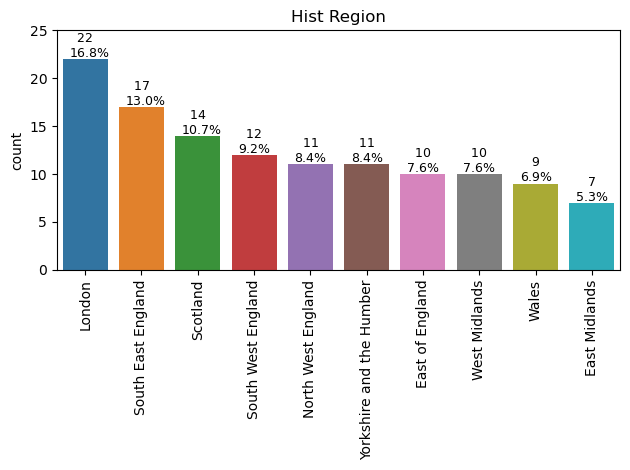

In [26]:
region_cnt = df['Region'].value_counts()
barPlot(region_cnt, 'count', 'Hist Region', annotate_x_offset=0.1)

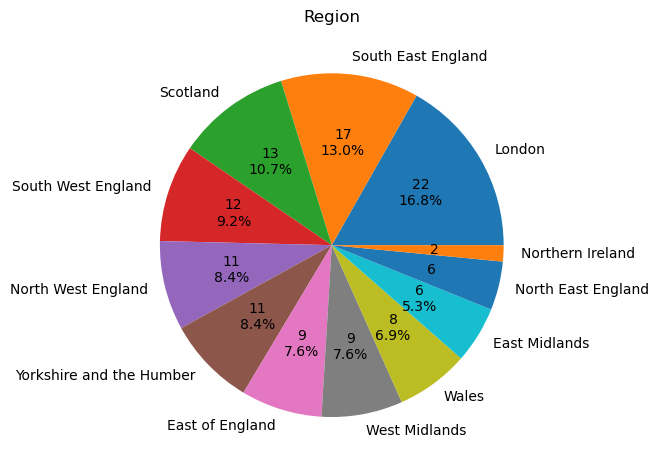

In [17]:
region_cnt = df['Region'].value_counts()
piePlot(region_cnt, 'Region')

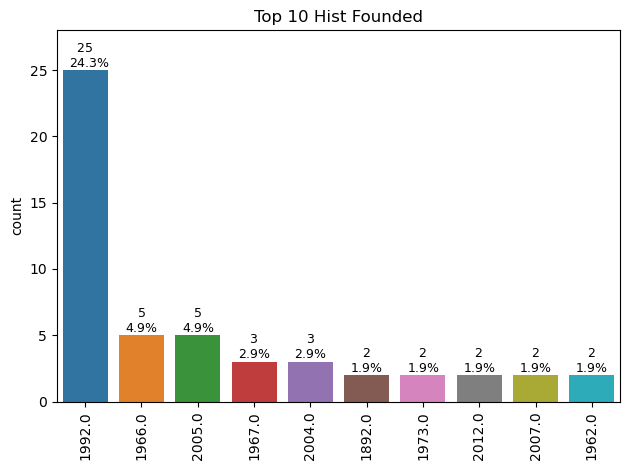

In [28]:
history = df['Founded_year'].value_counts()
# print(history)

barPlot(history, 'count', 'Top 10 Hist Founded', annotate_x_offset=0.1)

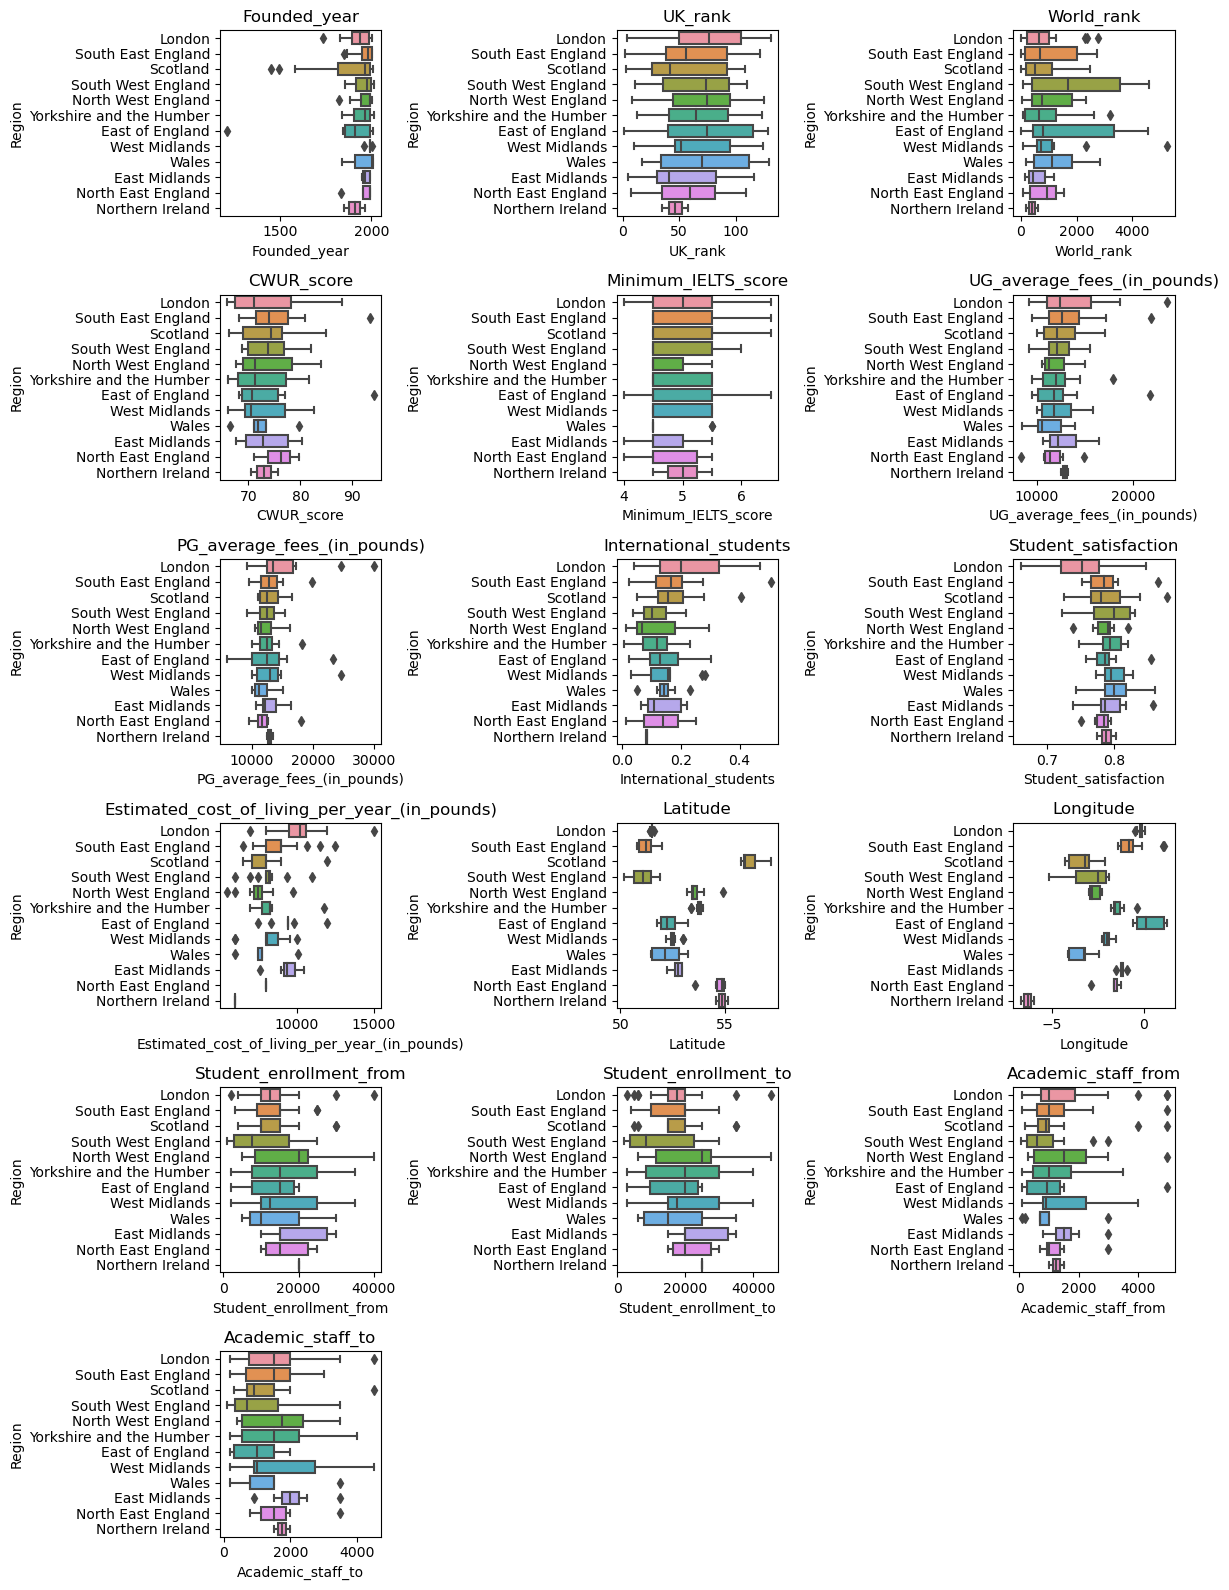

In [19]:
fig = plt.figure(figsize=(12, 16))

# print(df.select_dtypes(include='number').columns)
continuous_columns = [
   'Founded_year', 'UK_rank', 'World_rank', 'CWUR_score',
   'Minimum_IELTS_score', 'UG_average_fees_(in_pounds)',
   'PG_average_fees_(in_pounds)', 'International_students',
   'Student_satisfaction', 'Estimated_cost_of_living_per_year_(in_pounds)',
   'Latitude', 'Longitude', 'Student_enrollment_from',
   'Student_enrollment_to', 'Academic_staff_from', 'Academic_staff_to'
]

order = df['Region'].value_counts().index

for i, col in enumerate(continuous_columns):
    plt.subplot(len(continuous_columns) // 3 + 1, 3, i + 1)
    plt.title(col)
    # order = df.groupby('Region')[col].median().sort_values().index
    sns.boxplot(data=df, x=df[col], y=df['Region'], order=order)

plt.tight_layout()
plt.savefig(f'plots/knowledge_gained/barplot_matrix.png')
plt.show()

,min,mean,median,max
Region,,,,
London,9250,14823.863636,13500.0,29900
West Midlands,10000,13593.900000,13000.0,24500
Northern Ireland,12495,12962.500000,12962.5,13430
South East England,9500,12934.294118,12830.0,19888
East of England,6000,12843.200000,12500.0,23187
Scotland,11000,12965.571429,12500.0,16500
South West England,9250,12550.000000,12500.0,15500
Yorkshire and the Humber,10000,12740.000000,12500.0,18240
East Midlands,10700,12968.142857,12200.0,16400


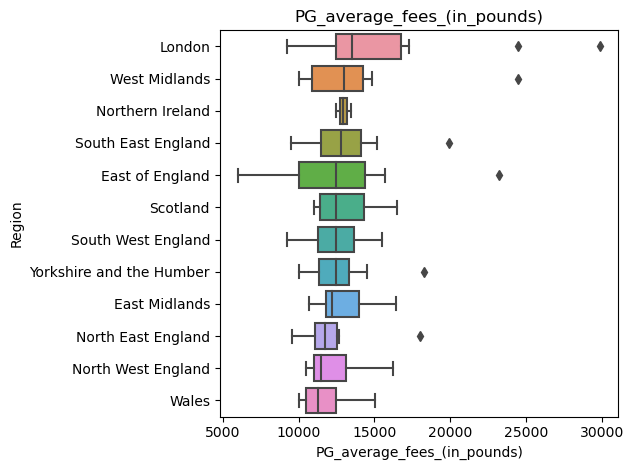

In [30]:
colName = 'PG_average_fees_(in_pounds)'
groupName = 'Region'
order = df.groupby(groupName)[colName].median().sort_values(ascending=False).index
display(df.groupby(groupName)[colName].agg(['min', 'mean', np.median, max]).loc[order])

snsBoxplot(df, colName=colName, groupName=groupName, title='PG fees per region', order=order)

,min,mean,median,max
Region,,,,
Northern Ireland,12495,12887.500000,12887.5,13280
South East England,9500,13096.470588,12660.0,21770
London,9250,13498.636364,12355.0,23500
East Midlands,10700,12864.714286,12163.0,16400
South West England,9250,12337.500000,12125.0,15500
Scotland,10000,12571.571429,12112.5,17040
Yorkshire and the Humber,9500,12230.909091,12000.0,17890
West Midlands,10000,12206.600000,11810.0,15820
East of England,9495,12449.500000,11750.0,21750


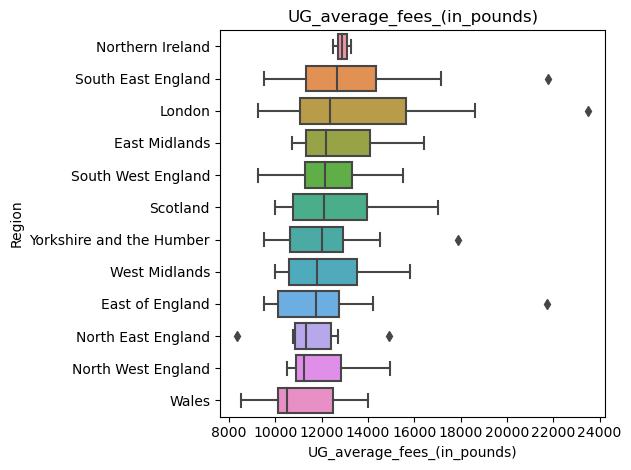

In [31]:
colName = 'UG_average_fees_(in_pounds)'
groupName = 'Region'
order = df.groupby(groupName)[colName].median().sort_values(ascending=False).index
display(df.groupby(groupName)[colName].agg(['min', 'mean', np.median, max]).loc[order])

snsBoxplot(df, colName=colName, groupName=groupName, title='UG fees per region', order=order)

,min,mean,median,max
Region,,,,
London,7000,10228.727273,10229.0,15000
East of England,7500,9415.000000,9415.0,12000
East Midlands,7650,9398.000000,9398.0,10500
South East England,6500,8990.000000,8990.0,12500
Yorkshire and the Humber,7000,8269.909091,8270.0,11789
South West England,6000,8216.833333,8217.0,11000
West Midlands,6000,8096.800000,8097.0,10000
North East England,8000,8000.000000,8000.0,8000
Scotland,6500,8000.000000,8000.0,12000


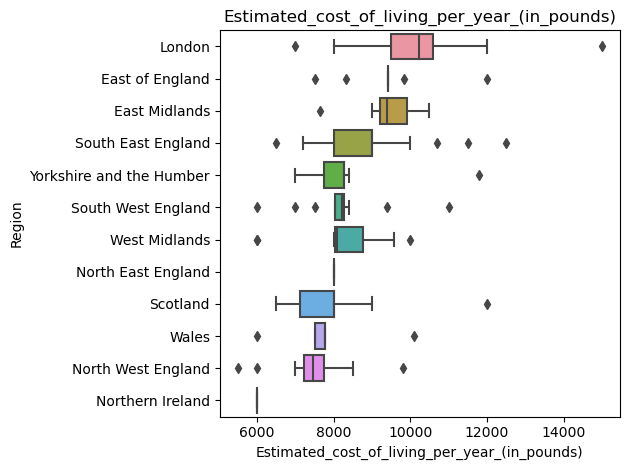

In [21]:
colName = 'Estimated_cost_of_living_per_year_(in_pounds)'
groupName = 'Region'
order = df.groupby(groupName)[colName].median().sort_values(ascending=False).index
display(df.groupby(groupName)[colName].agg(['min', 'mean', np.median, max]).loc[order])

snsBoxplot(df, colName=colName, groupName=groupName, title='Cost of living per region', order=order)

,min,mean,median,max
Campus_setting,,,,
Suburban,7000,8768.378378,8320.0,12000
Urban,5500,8634.911765,8243.5,15000
Rural,6000,7986.000000,8000.0,9400


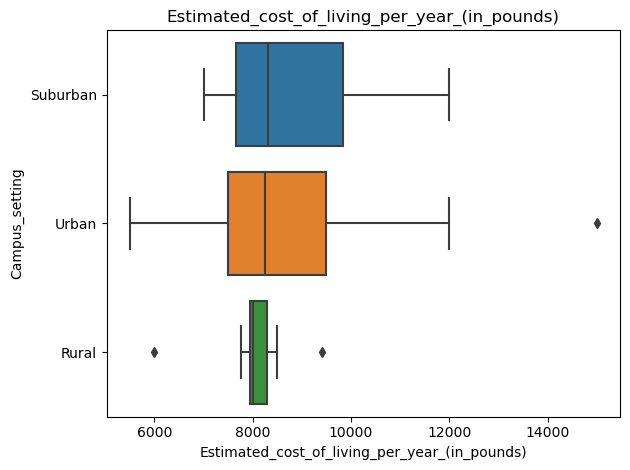

In [22]:
colName = 'Estimated_cost_of_living_per_year_(in_pounds)'
groupName = 'Campus_setting'

order = df.groupby(groupName)[colName].median().sort_values(ascending=False).index
display(df.groupby(groupName)[colName].agg(['min', 'mean', np.median, max]).loc[order])

snsBoxplot(df, colName=colName, groupName=groupName, title='Cost of living per campus_setting', order=order)

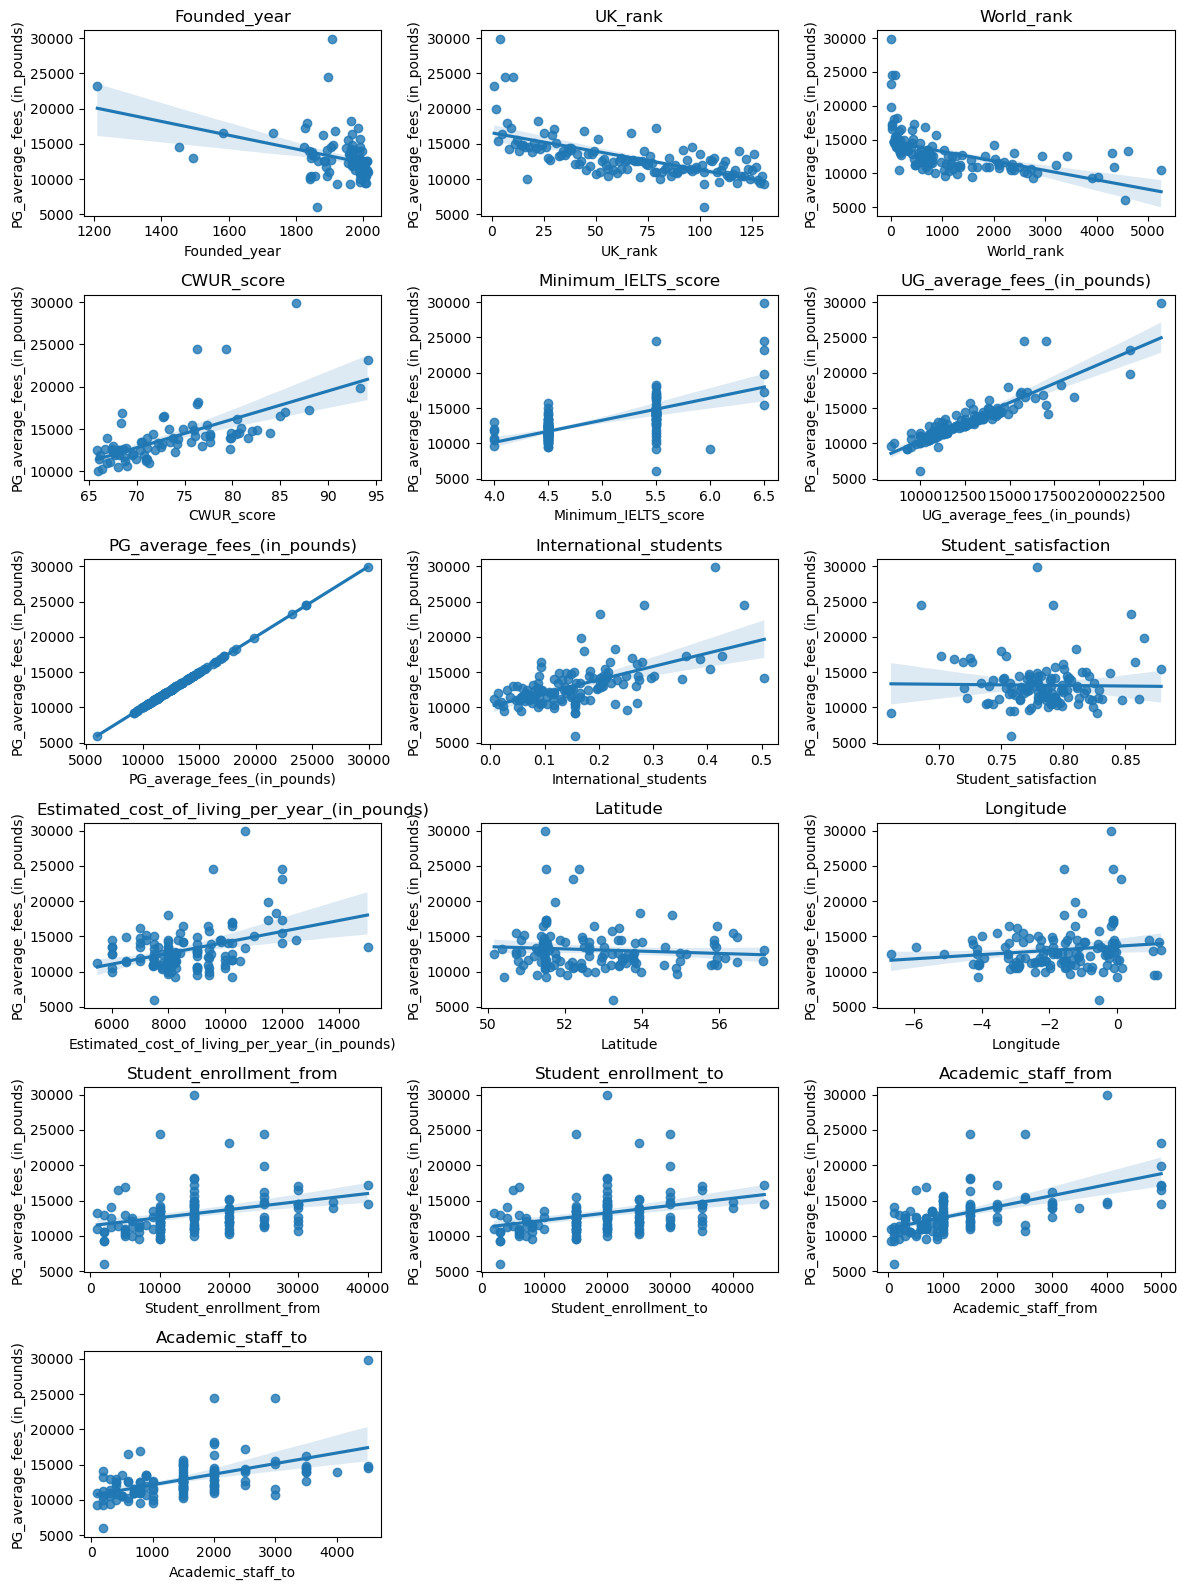

In [23]:
fig = plt.figure(figsize=(12, 16))

# print(df.select_dtypes(include='number').columns)
continuous_columns = [
   'Founded_year', 'UK_rank', 'World_rank', 'CWUR_score',
   'Minimum_IELTS_score', 'UG_average_fees_(in_pounds)',
   'PG_average_fees_(in_pounds)', 'International_students',
   'Student_satisfaction', 'Estimated_cost_of_living_per_year_(in_pounds)',
   'Latitude', 'Longitude', 'Student_enrollment_from',
   'Student_enrollment_to', 'Academic_staff_from', 'Academic_staff_to'
]

for i, col in enumerate(continuous_columns):
    plt.subplot(len(continuous_columns) // 3 + 1, 3, i + 1)
    plt.title(col)
    sns.regplot(data=df, x=df[col], y=df['PG_average_fees_(in_pounds)'])

plt.tight_layout()
plt.savefig(f'plots/knowledge_gained/regplot_matrix.png')
plt.show()



In [24]:
# https://duckduckgo.com/?q=python+plot+map&t=newext&atb=v233-1&ia=web
# https://infopython.com/how-to-plot-longitude-and-latitude-data-in-python/

import plotly.express as px

Lat_median = df.Latitude.median()
Lon_median = df.Longitude.median()

# fig = px.density_mapbox(df, lat='Latitude', lon='Longitude')
fig = px.scatter_geo(df, lat='Latitude', lon='Longitude', hover_name='University_name', center=dict(lat=Lat_median, lon=Lon_median), scope='europe')

fig.show()